In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format',lambda x : '%.2f' % x) # 禁用科學記號

In [2]:
df = pd.read_csv("Boy_or_girl_train.csv")
df.head()

,index,Timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,0,2017-07-04 13:47:57.495,2.00,處女座,Apple,154.00,43.00,2.00,180.00,583.00,0,Beautiful
1,1,2017-07-04 13:48:25.645,2.00,處女座,Apple,156.00,47.00,2.00,130.00,400.00,3.5,Enjoying being who I'm not
2,2,2017-07-04 13:49:15.348,1.00,射手座,Android,170.00,61.00,3.00,90.00,540.00,5,Practice Makes perfect
3,3,2017-07-04 13:49:15.792,1.00,射手座,Apple,170.00,62.00,4.00,100.00,173.00,5,Straightforward
4,4,2017-07-04 13:54:39.330,2.00,射手座,Android,158.00,67.00,3.00,128.00,320.00,1.2,Humorous


In [3]:
def dropIndexAndTimestamp(df):
    if {'index', 'Timestamp'}.issubset(df.columns):
        df.drop(['index', 'Timestamp'], axis=1, inplace=True)
    return df

In [4]:
def nominalLabelEncode(df):
    # lowercase string
    df['phone_os'] = df['phone_os'].str.lower()
    # removing leading and trailing whitespaces
    df['phone_os'] = df['phone_os'].str.strip()

    coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
    coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}

    df = df.replace({"star_sign": coded_star_signs})
    df = df.replace({"phone_os": coded_phone_os})
    return df

In [5]:
def selfIntroEncode(df):
    df['new_self_intro'] = df['self_intro'].apply(lambda x: 1 if 'andsome' in str(x) else 0)
    df.drop(['self_intro'], axis=1, inplace=True)
    return df

In [6]:
def scaleOutliers(df):
    rule = [
            {'column':'height', 'max':200, 'min':145, 'maxValue':None, 'minValue':None},
            {'column':'weight', 'max':100, 'min':45, 'maxValue':None, 'minValue':None},
            {'column':'fb_friends', 'max':2000, 'min':0, 'maxValue':2000, 'minValue':0},
            {'column':'yt', 'max':20, 'min':0, 'maxValue':None, 'minValue':0, 'to_num':True},
            {'column':'iq', 'max':200, 'min':0, 'maxValue':None, 'minValue':0, 'to_num':True}
    ]

    for r in rule:
        if r.get('to_num')!=None:
            df[r.get('column')] = pd.to_numeric(df[r.get('column')], errors='coerce')
        if r.get('max')!=None:
            indexRemove = df[df[r.get('column')]>r.get('max')].index
            df.loc[indexRemove, r.get('column')] = r.get('maxValue')
        if r.get('min')!=None:
            indexRemove = df[df[r.get('column')]<r.get('min')].index
            df.loc[indexRemove, r.get('column')] = r.get('minValue')
            
    for r in rule:
        hasValue = df[df[r.get('column')].notna()].index
        valueMean = df.loc[hasValue, r.get('column')].mean()
        df[r.get('column')] = df[r.get('column')].fillna(valueMean)
    return df

In [7]:
def addBMI(df):
    df['bmi'] = df['weight']/((df['height']/100) ** 2) # range from 11.25~95.125
    return df

In [54]:
def binning(df):
    # Bucketing values into bins
    # height	weight	iq	fb_friends	yt
    # range(min-1, max+range+1, range) 為了涵蓋頭尾，max自成一類。
    # min max值是copy上方rules的喔，記得兩邊一起改。
    bins = {
        'height': list(range(145-1, 200+5+1, 5)), #12 bins
        'weight': list(range(45-1, 100+5+1, 5)), #12 bins
        'iq':     list(range(0-1, 200+20+1, 20)), #10 bins
        'fb_friends': list(range(0-1, 2000+200+1, 200)), #10 bins
        'yt':     [-0.1, 0.5 ,1.0, 2.0, 4.0, 10.0, 20.0], # 6 bins
        'bmi':    list(range(12-1, 36+2+1, 2)), #13+1 bins
    }
    bins['bmi'].append(96) # 應付極端值 自成一類
    for key in bins.keys():
        df[key] = pd.cut(df[key], bins[key], labels=False)
    return df

### My script

In [55]:
df = pd.read_csv("Boy_or_girl_train.csv")
df.head()

,index,Timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,0,2017-07-04 13:47:57.495,2.00,處女座,Apple,154.00,43.00,2.00,180.00,583.00,0,Beautiful
1,1,2017-07-04 13:48:25.645,2.00,處女座,Apple,156.00,47.00,2.00,130.00,400.00,3.5,Enjoying being who I'm not
2,2,2017-07-04 13:49:15.348,1.00,射手座,Android,170.00,61.00,3.00,90.00,540.00,5,Practice Makes perfect
3,3,2017-07-04 13:49:15.792,1.00,射手座,Apple,170.00,62.00,4.00,100.00,173.00,5,Straightforward
4,4,2017-07-04 13:54:39.330,2.00,射手座,Android,158.00,67.00,3.00,128.00,320.00,1.2,Humorous


In [56]:
def preprocess(df):
    df = dropIndexAndTimestamp(df)
    df.dropna(axis=0, how="all", inplace=True)
    df = nominalLabelEncode(df)
    df = selfIntroEncode(df)
    df = scaleOutliers(df)
    df = addBMI(df)
    df = binning(df)
    return df

In [57]:
df = preprocess(df)
df

[11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 96]


,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,new_self_intro,bmi
0,2.00,8,1,1,4,2.00,9,2,0,0,8
1,2.00,8,1,2,0,2.00,6,2,3,0,4
2,1.00,11,2,5,3,3.00,4,2,4,0,5
3,1.00,11,1,5,3,4.00,5,0,4,0,5
4,2.00,11,2,2,4,3.00,6,1,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...
240,2.00,2,4,5,4,5.00,9,0,1,0,5
241,1.00,6,1,6,4,5.00,5,1,4,1,5
242,1.00,10,2,5,4,1.00,2,0,0,0,5
243,1.00,3,2,5,4,1.00,10,0,0,0,5


檢查資料清理的如何? 怎麼還有null??

In [37]:
df.isnull().sum()

gender            0
star_sign         0
phone_os          0
height            0
weight            0
sleepiness        0
iq                0
fb_friends        0
yt                0
new_self_intro    0
bmi               0
dtype: int64

### Binning
這裡是設計 bins 的 code，寫好才能貼到上面的 script。

In [13]:
bins = {
    'height': list(range(145-1, 200+5+1, 5)), #12 bins
    'weight': list(range(45-1, 100+5+1, 5)), #12 bins
    'iq':     list(range(0-1, 200+20+1, 20)), #10 bins
    'fb_friends': list(range(0-1, 2000+200+1, 200)), #10 bins
    'yt':     [-0.1, 0.5 ,1.0, 2.0, 4.0, 10.0, 20.0] # 6 bins
}

In [14]:
bins['height']

[144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204]

In [15]:
pd.cut(df['fb_friends'], bins['fb_friends'], labels=False)

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    0
Name: fb_friends, Length: 244, dtype: int64

In [16]:
bins.keys()

dict_keys(['height', 'weight', 'iq', 'fb_friends', 'yt'])

In [17]:
for key in bins.keys():
    print(pd.cut(df[key], bins[key], labels=False).isnull().sum())

244
244
0
0
0


testing

In [18]:
# height	weight	iq	fb_friends	yt
category = pd.cut(df['height'], 12, labels=False)
print(category)

0      1
1      2
2      5
3      5
4      2
      ..
240    5
241    6
242    5
243    5
244    5
Name: height, Length: 244, dtype: int64


In [19]:
type(category)

pandas.core.series.Series

In [20]:
category.value_counts()

5     82
4     41
6     39
7     29
3     25
2     15
1      6
8      4
11     1
9      1
0      1
Name: height, dtype: int64

In [21]:
df['height'].max()

11

### Visualize
先看看各類別的數量分布，調整好min max，再決定bins的間距。

In [22]:
print("{:.2f}".format(df['yt'].max()))

5.00


In [23]:
df['height'].value_counts().sort_index()

0      1
1      6
2     15
3     25
4     41
5     82
6     39
7     29
8      4
9      1
11     1
Name: height, dtype: int64

In [24]:
df['height'].value_counts().sort_index().plot(kind='barh')

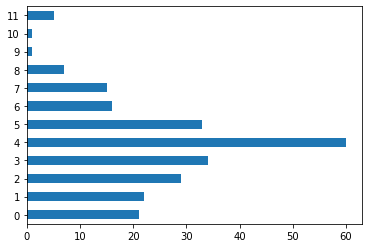

In [25]:
df['weight'].value_counts().sort_index().plot(kind='barh')

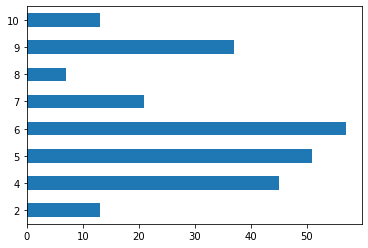

In [26]:
df['iq'].value_counts().sort_index().plot(kind='barh')

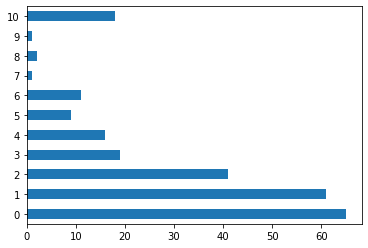

In [27]:
df['fb_friends'].value_counts().sort_index().plot(kind='barh')

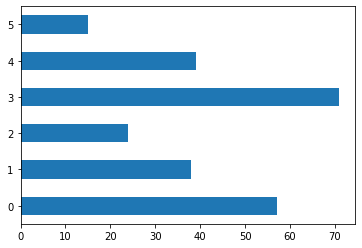

In [28]:
df['yt'].value_counts().sort_index().plot(kind='barh')

In [29]:
# yt=0要特別 bin
df['yt'].value_counts().sort_index()

0    57
1    38
2    24
3    71
4    39
5    15
Name: yt, dtype: int64

In [31]:
print(df['bmi'].min(), df['bmi'].max())

16.3265306122449 35.43083900226758


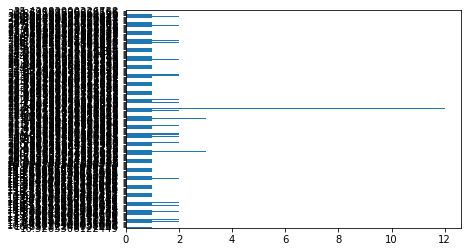

In [30]:
df['bmi'].value_counts().sort_index().plot(kind='barh')